## Generating dataset for segmentation

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
from nino.train import dataset as ds, textdataset as td, eqndataset as ed, segdataset as sd

In [4]:
from importlib import reload
reload(sd)

<module 'nino.train.segdataset' from '/Users/atadenizaydin/Documents/course material/cs491/nino-server/nino/train/segdataset.py'>

In [28]:
import nino.utils.imgprep as ip

In [5]:
textdir = '/Users/atadenizaydin/Documents/course material/cs491/mxnet/dataset/iamdataset'
eqndir = '/Users/atadenizaydin/Documents/course material/cs491/im2latex/data'

In [6]:
%%time
iam = td.IAMDataset('lines', textdir, msb=True, tabulate=True, sort=True)

CPU times: user 2.04 s, sys: 51.4 ms, total: 2.09 s
Wall time: 2.19 s


In [7]:
%%time
har = ed.HarvardDataset(eqndir, 'train', tabulate=True, sort=True)

CPU times: user 1.89 s, sys: 122 ms, total: 2.01 s
Wall time: 2.12 s


In [8]:
%%time
segds = sd.SegmentDataset(iam, har, n=20, lmin=500, sc=1, nmax=10, p=1, sort=True)

CPU times: user 18.1 s, sys: 280 ms, total: 18.4 s
Wall time: 19.3 s


In [9]:
note = segds.samlist[1].note

In [10]:
note.rect.shape()

(620, 736)

In [11]:
img = note.annot.image

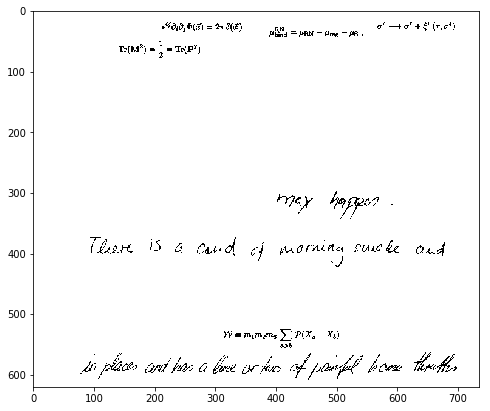

In [12]:
plt.figure().set_size_inches((8,12))
plt.imshow(img, cmap='gray')

In [17]:
gnd = sd.GroundTruthViewer().visit(note)

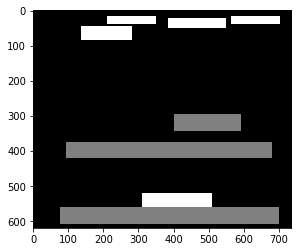

In [18]:
plt.imshow(gnd, cmap='gray')